In [6]:
from pathlib import Path
import duckdb
import pandas as pd
import matplotlib.pyplot as plt

DB_PATH = Path("ds_week1.duckdb")  # same folder as this notebook

print("CWD:", Path.cwd())
print("DB exists?", DB_PATH.exists(), "| path:", DB_PATH.resolve())

con = duckdb.connect(str(DB_PATH))
con.execute("SHOW TABLES").df()


CWD: c:\Users\praty\OneDrive\Documents\GitHub\ds-week1-2\notebooks
DB exists? True | path: C:\Users\praty\OneDrive\Documents\GitHub\ds-week1-2\notebooks\ds_week1.duckdb


,name
0,events
1,orders
2,users


In [7]:
# Query to calculate Daily Active Users (DAU)
q_dau = """
SELECT DATE(event_time) AS dt,
       COUNT(DISTINCT user_id) AS dau
FROM events
GROUP BY 1
ORDER BY 1;
"""

dau = con.execute(q_dau).df()
dau.head()

,dt,dau
0,2025-11-01,553
1,2025-11-02,564
2,2025-11-03,531
3,2025-11-04,585
4,2025-11-05,556


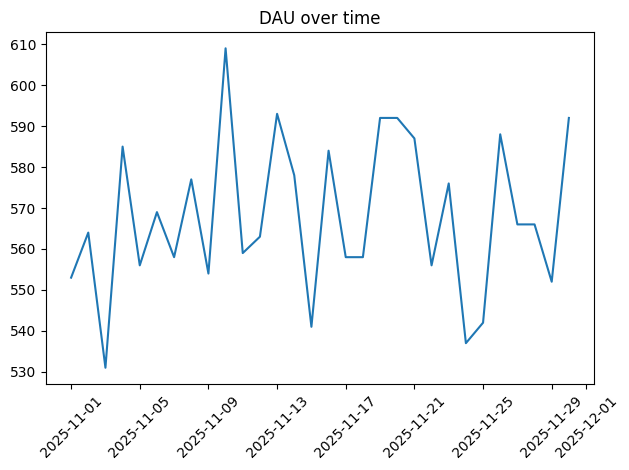

In [9]:
# Plotting DAU over time
plt.figure()
plt.plot(dau["dt"], dau["dau"])
plt.xticks(rotation=45)
plt.title("DAU over time")
plt.tight_layout()
plt.show()

In [10]:
# Query to calculate Daily Revenue and Purchasers
q_rev = """
SELECT DATE(order_time) AS dt,
       COUNT(DISTINCT user_id) AS purchasers,
       SUM(revenue) AS revenue
FROM orders
GROUP BY 1
ORDER BY 1;
"""

rev = con.execute(q_rev).df()
rev.head()

,dt,purchasers,revenue
0,2025-11-01,12,237.20
1,2025-11-02,13,364.78
2,2025-11-03,18,516.17
3,2025-11-04,13,312.13
4,2025-11-05,13,329.76


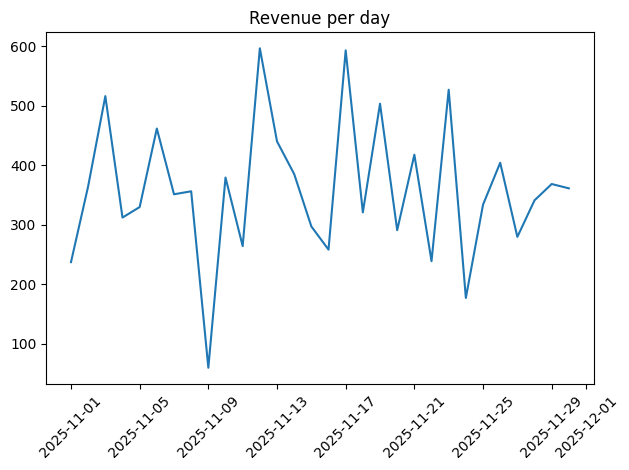

In [11]:
# Plotting Revenue over time
plt.figure()
plt.plot(rev["dt"], rev["revenue"])
plt.xticks(rotation=45)
plt.title("Revenue per day")
plt.tight_layout()
plt.show()